# Short Project 3

Group Members: Gabrielle Stedman and Oscar Ramfelt

## Short Practical 1

### 1. Create a long-tailed distribution to model coverage values and their associated probability values.

In [1]:
from scipy.stats import lognorm
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

matplotlib.rcParams['figure.figsize'] = [15, 5]

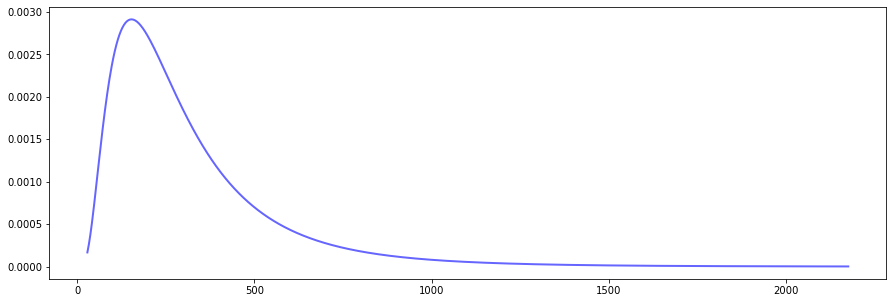

In [2]:
fig, ax = plt.subplots(1, 1)

s = 0.7
scale = 250

mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')

x = np.linspace(lognorm.ppf(0.001, s, scale=scale), 
                lognorm.ppf(0.999, s, scale=scale), 1000)

distribution = lognorm.pdf(x, s, scale=scale)

ax.plot(x, distribution, 'b-', lw=2, alpha=0.6, label='lognorm pdf')

### 2. Abundances for 20k Genes
Use your probability distribution above along as a parameter to the multinomial to sample abundances for 20k genes.

In [3]:
# Run 20000 genes through the previous 
genes = (np.random.multinomial(1,np.array(distribution/sum(distribution)),
                               size=20000)==1).argmax(1)


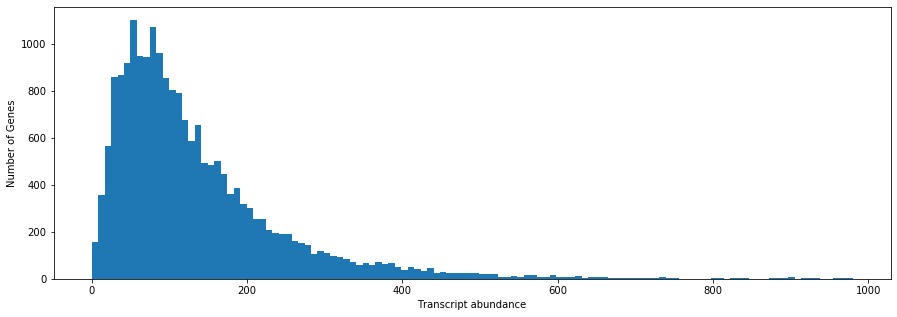

In [4]:
_ = plt.hist(genes, bins='auto')
plt.xlabel("Transcript abundance")
plt.ylabel("Number of Genes")
plt.show()

### 3. Normalize the Distribution of RNAs

Normalize the array and pass it as a param for the multinomial. How does varying the coverage change your estimate of the true distribution?

**Optional: Come up with a metric to quantify the observed difference?**

In [5]:
dist_genes = genes/sum(genes)

realistic_genes = np.random.multinomial(20000,np.array(dist_genes), size=1)
realistic_genes = realistic_genes.flatten()

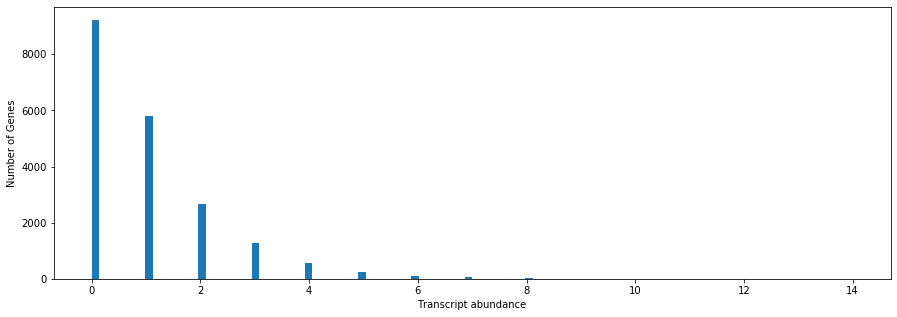

In [6]:
_ = plt.hist(realistic_genes, bins=100)
plt.xlabel("Transcript abundance")
plt.ylabel("Number of Genes")
plt.show()

In [7]:
realistic_genes = np.random.multinomial(100000,np.array(dist_genes), size=1)
realistic_genes = realistic_genes.flatten()

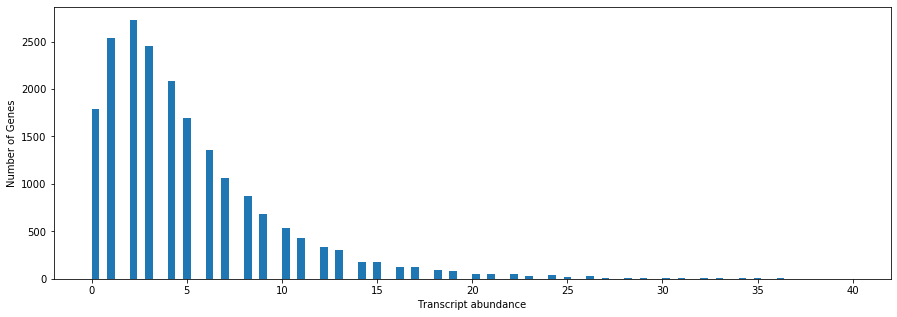

In [8]:
_ = plt.hist(realistic_genes, bins=100)
plt.xlabel("Transcript abundance")
plt.ylabel("Number of Genes")
plt.show()

In [9]:
realistic_genes = np.random.multinomial(2500000,np.array(dist_genes), size=1)
realistic_genes = realistic_genes.flatten()

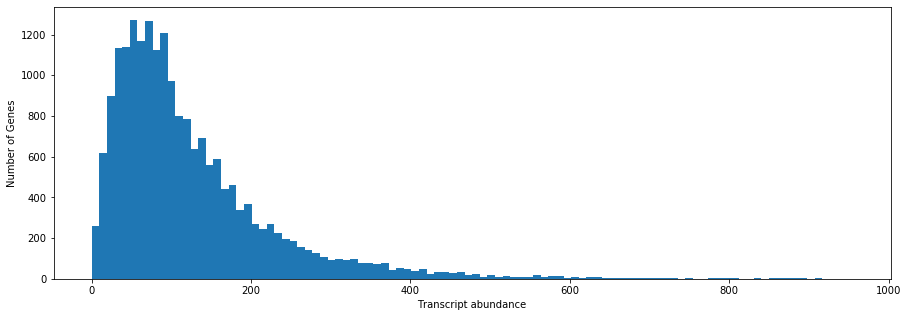

In [10]:
_ = plt.hist(realistic_genes, bins=100)
plt.xlabel("Transcript abundance")
plt.ylabel("Number of Genes")
plt.show()

As coverage increases we get a better and better estimation of the "true" distribution for the transcripts. A low coverage the distribution is not at all discernable.